### Importing required Library's

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### From the Training Data set we first load main_loan_base.

In [2]:
# Loanding the main_loan_base 
loan_base = pd.read_csv('main_loan_base.csv')

In [3]:
loan_base.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [4]:
#For the purpose of predicting LGD we feel that 'customer_name', 'customer_address' columns hold no value so
# we are dropping those columns.
loan_base = loan_base.drop(['customer_name', 'customer_address'], axis=1)

In [5]:
#Converting 'default_date' & 'disbursal_date' columns into datetime format.
loan_base['default_date'] = loan_base['default_date'].astype('datetime64[ns]')
loan_base['disbursal_date'] = loan_base['disbursal_date'].astype('datetime64[ns]')

In [6]:
loan_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_acc_num       50000 non-null  object        
 1   loan_type          50000 non-null  object        
 2   loan_amount        50000 non-null  int64         
 3   collateral_value   50000 non-null  float64       
 4   cheque_bounces     50000 non-null  int64         
 5   number_of_loans    50000 non-null  int64         
 6   missed_repayments  50000 non-null  int64         
 7   vintage_in_months  50000 non-null  int64         
 8   tenure_years       50000 non-null  int64         
 9   interest           50000 non-null  float64       
 10  monthly_emi        50000 non-null  float64       
 11  disbursal_date     50000 non-null  datetime64[ns]
 12  default_date       50000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(6), object(2)
memory 

In [7]:
# Checking for missing/ na values in the columns.
for column in loan_base:
    btao = loan_base[column].isna().sum()
    btao2 = (btao * 100)/len(loan_base)
    print(column + " -> " + str(btao2) + ' %')

loan_acc_num -> 0.0 %
loan_type -> 0.0 %
loan_amount -> 0.0 %
collateral_value -> 0.0 %
cheque_bounces -> 0.0 %
number_of_loans -> 0.0 %
missed_repayments -> 0.0 %
vintage_in_months -> 0.0 %
tenure_years -> 0.0 %
interest -> 0.0 %
monthly_emi -> 0.0 %
disbursal_date -> 0.0 %
default_date -> 0.0 %


In [8]:
loan_base.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,3.816870e+05,57189.733515,1.764740,1.509540,9.808280,80.01584,2.994620,11.484584,16590.946912
std,5.037605e+05,93407.376232,1.760175,1.259389,7.788007,44.14149,1.415539,2.019853,26693.294806
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.00000,1.000000,8.000000,42.520000
25%,2.393550e+04,3329.392500,0.000000,0.000000,4.000000,44.00000,2.000000,9.700000,1158.460000
50%,1.926885e+05,19863.105000,1.000000,1.000000,8.000000,78.00000,3.000000,11.500000,6541.350000
75%,4.334075e+05,62313.440000,3.000000,2.000000,15.000000,113.00000,4.000000,13.200000,19436.355000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.00000,5.000000,15.000000,179521.680000


In [9]:
num_cols = loan_base.select_dtypes('number').columns

In [10]:
# Creating a new column 'loan_tenure' which is difference between 'default_date' & 'disbursal_date' in months.
loan_base['loan_tenure'] = (loan_base['default_date'] - loan_base['disbursal_date'])/np.timedelta64(1,'M')

In [11]:
loan_base['loan_tenure'] = loan_base['loan_tenure'].astype('int')

In [12]:
# Now we have loan_tenure in months.
# We can drop the both date columns 'default_date', 'disbursal_date'.
loan_base = loan_base.drop(['default_date', 'disbursal_date'], axis = 1)
loan_base.head()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure
0,LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,15
1,LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,15
2,LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,3
3,LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,7
4,LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,13


### Loading Train Repayment Data

In [13]:
# Loading the main_repayment_base 
repayment_base = pd.read_csv('repayment_base.csv')

In [14]:
repayment_base.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [15]:
repayment_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [16]:
# Earlier we saw that number of loan_acc_num is 50k now we are getting a figure of 626.6k lets explore that

In [17]:
repayment_base.nunique(axis = 0)

loan_acc_num         46008
repayment_amount    138950
repayment_date        4813
dtype: int64

In [18]:
# Checking for missing/ na values in the columns.
for column in repayment_base:
    btao = repayment_base[column].isna().sum()
    btao2 = (btao * 100)/len(loan_base)
    print(column + " -> " + str(btao2) + ' %')

loan_acc_num -> 0.0 %
repayment_amount -> 0.0 %
repayment_date -> 0.0 %


In [19]:
repayment_base['repayment_amount'] = repayment_base['repayment_amount'].round(2)
repayment_base.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.32,2019-05-18
1,LN79307711,667.99,2019-06-20
2,LN79307711,1012.32,2019-07-16
3,LN79307711,1012.32,2019-08-16
4,LN79307711,1012.32,2019-09-22


In [20]:
# Lets calculate the total amount which has been repayed for each loan.

In [21]:
repayment_base.drop(['repayment_date'], axis = 1)

,loan_acc_num,repayment_amount
0,LN79307711,1012.32
1,LN79307711,667.99
2,LN79307711,1012.32
3,LN79307711,1012.32
4,LN79307711,1012.32
...,...,...
626596,LN74765572,3771.91
626597,LN74765572,3771.91
626598,LN46546410,21443.47
626599,LN46546410,21443.47


In [22]:
group_repayment = repayment_base.groupby(by = ['loan_acc_num']).sum()

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\3896089517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_repayment = repayment_base.groupby(by = ['loan_acc_num']).sum()


In [23]:
group_repayment = group_repayment.reset_index()

In [24]:
group_repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.46
2,LN10004116,290634.94
3,LN10007976,337321.71
4,LN10010204,61290.49


In [25]:
group_repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46008 entries, 0 to 46007
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_acc_num      46008 non-null  object 
 1   repayment_amount  46008 non-null  float64
dtypes: float64(1), object(1)
memory usage: 719.0+ KB


In [26]:
group_repayment.nunique(axis = 0)

loan_acc_num        46008
repayment_amount    45943
dtype: int64

### Loading Train monthly account balance data

In [27]:
monthly_balance = pd.read_csv('monthly_balance_base.csv')

In [28]:
monthly_balance.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [29]:
monthly_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [30]:
# Dropping the date column as we dont need it.
monthly_balance.drop(['date'], axis = 1)

,loan_acc_num,balance_amount
0,LN79307711,407.343213
1,LN79307711,545.431227
2,LN79307711,861.932145
3,LN79307711,562.082133
4,LN79307711,37.768861
...,...,...
4002485,LN46546410,10875.235336
4002486,LN46546410,8479.809099
4002487,LN46546410,9745.974332
4002488,LN46546410,9226.494566


In [31]:
for column in monthly_balance:
    btao = monthly_balance[column].isna().sum()
    btao2 = (btao * 100)/len(monthly_balance)
    print(column + " -> " + str(btao2) + ' %')

loan_acc_num -> 0.0 %
date -> 0.0 %
balance_amount -> 0.0 %


In [32]:
#Consolidating the average balance via 'loan_acc_num'.
grouped_monthly = monthly_balance.groupby(by=['loan_acc_num']).mean()

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\2974728870.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_monthly = monthly_balance.groupby(by=['loan_acc_num']).mean()


In [33]:
grouped_monthly = grouped_monthly.reset_index()

In [34]:
grouped_monthly

,loan_acc_num,balance_amount
0,LN10000701,2301.879193
1,LN10001077,2296.279543
2,LN10004116,8887.380832
3,LN10007976,9420.561560
4,LN10010204,6446.205233
...,...,...
49666,LN99991810,20537.816328
49667,LN99992591,263.078287
49668,LN99995043,267.037722
49669,LN99995214,202.563984


In [35]:
# Rounding off to two decimal place the 'balance_amount' column.
grouped_monthly['balance_amount'] = grouped_monthly['balance_amount'].round(2)

In [36]:
grouped_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_acc_num    49671 non-null  object 
 1   balance_amount  49671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 776.2+ KB


In [37]:
grouped_monthly.nunique(axis = 0)

loan_acc_num      49671
balance_amount    47059
dtype: int64

# now our monthly balance data is also ready to be mearged with loan_base data

In [38]:
# Merging 'loan_base' data with 'group_repayment' data set.
data1 = loan_base.merge(group_repayment, how = 'outer', on = 'loan_acc_num')

In [39]:
# Merging 'data1' with 'grouped_monthly' data set.
data = data1.merge(grouped_monthly, how = 'outer', on = 'loan_acc_num')

In [40]:
data.head()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount
0,LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,15,13572.58,585.51
1,LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,15,96243.61,7382.03
2,LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,3,74083.73,7812.88
3,LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,7,NaN,518.08
4,LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,13,4462.52,323.68


In [41]:
data.tail()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount
49995,LN82044693,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,11,30676.32,4512.21
49996,LN37968463,Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,14,38421.07,1501.42
49997,LN87152445,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,9,43784.34,2910.57
49998,LN74765572,Two-Wheeler,77869,10652.77,0,0,5,84,2,14.9,3771.91,13,52305.66,4152.07
49999,LN46546410,Two-Wheeler,241857,59258.17,0,2,3,67,1,11.6,21443.47,5,64330.41,7935.38


In [42]:
data[['repayment_amount', 'balance_amount']].describe()

,repayment_amount,balance_amount
count,4.602300e+04,49686.000000
mean,1.645432e+05,7678.490833
std,2.622382e+05,16119.892191
min,5.228000e+01,0.100000
25%,1.076201e+04,412.062500
50%,6.155783e+04,2151.835000
75%,1.829428e+05,7339.770000
max,1.852111e+06,261799.900000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   loan_type          50000 non-null  object 
 2   loan_amount        50000 non-null  int64  
 3   collateral_value   50000 non-null  float64
 4   cheque_bounces     50000 non-null  int64  
 5   number_of_loans    50000 non-null  int64  
 6   missed_repayments  50000 non-null  int64  
 7   vintage_in_months  50000 non-null  int64  
 8   tenure_years       50000 non-null  int64  
 9   interest           50000 non-null  float64
 10  monthly_emi        50000 non-null  float64
 11  loan_tenure        50000 non-null  int32  
 12  repayment_amount   46023 non-null  float64
 13  balance_amount     49686 non-null  float64
dtypes: float64(5), int32(1), int64(6), object(2)
memory usage: 5.5+ MB


In [44]:
# We find missing values in 'repayment_amount' & 'balance_amount'

In [45]:
data.isnull().sum().sum()

4291

In [46]:
# Replacing missing values by 0 as we can assume that no repayment has been done in these loan accounts.
# and account balance is also 0. 

In [47]:
data['repayment_amount'] = data['repayment_amount'].fillna(0)

In [48]:
data['balance_amount'] = data['balance_amount'].fillna(0)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   loan_type          50000 non-null  object 
 2   loan_amount        50000 non-null  int64  
 3   collateral_value   50000 non-null  float64
 4   cheque_bounces     50000 non-null  int64  
 5   number_of_loans    50000 non-null  int64  
 6   missed_repayments  50000 non-null  int64  
 7   vintage_in_months  50000 non-null  int64  
 8   tenure_years       50000 non-null  int64  
 9   interest           50000 non-null  float64
 10  monthly_emi        50000 non-null  float64
 11  loan_tenure        50000 non-null  int32  
 12  repayment_amount   50000 non-null  float64
 13  balance_amount     50000 non-null  float64
dtypes: float64(5), int32(1), int64(6), object(2)
memory usage: 5.5+ MB


In [50]:
# now our data is ready and we can go ahead with calculating LGD
# LGD = (loan Amount -(Amount repayed + Collateral Value))/ Loan Amount

In [51]:
data['lgd_pct'] = (data['loan_amount'] - (data['repayment_amount'] + data['collateral_value'])) / data['loan_amount']

In [52]:
data.head()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct
0,LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,15,13572.58,585.51,0.155774
1,LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,15,96243.61,7382.03,0.121187
2,LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,3,74083.73,7812.88,0.609336
3,LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,7,0.00,518.08,0.802205
4,LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,13,4462.52,323.68,0.361463


<Axes: >

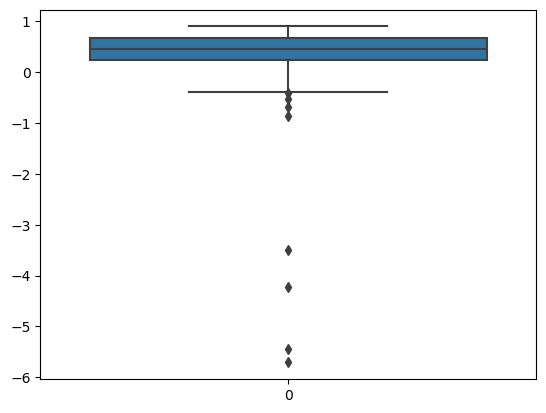

In [53]:
sns.boxplot(data['lgd_pct'])

In [54]:
n_values = data.loc[data['lgd_pct'] < 0]
#df.loc[(df['col1'] == value) & (df['col2'] < value)]

In [55]:
n_values.shape

(101, 15)

In [56]:
data['lgd_pct'] = data['lgd_pct'].apply(lambda x: x if x>0 else 0 )

<Axes: >

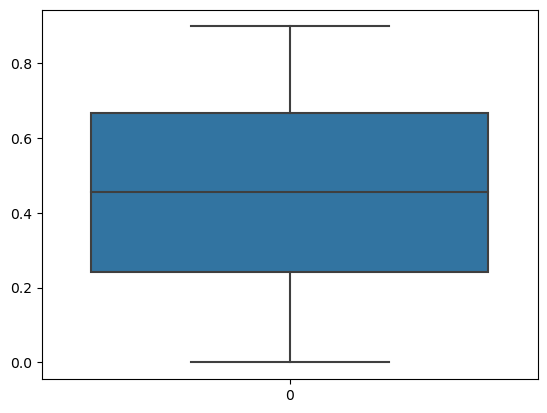

In [57]:
sns.boxplot(data['lgd_pct'])

In [58]:
# Naming the data to be used for training the model as 'train-data'
train_data = data

# Now lets prepare the test data in a similar way

In [59]:
# Loading the data set to be used for testing the model.
test_main_base = pd.read_csv('test_main_loan_base.csv')

In [60]:
test_main_base.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [61]:
#For the purpose of predicting LGD we feel that 'customer_name', 'customer_address' columns hold no value so
# we are dropping those columns.

test_main_base = test_main_base.drop(['customer_name', 'customer_address'], axis=1)

In [62]:
#Converting 'default_date' & 'disbursal_date' columns into datetime format.
test_main_base['default_date'] = test_main_base['default_date'].astype('datetime64[ns]')
test_main_base['disbursal_date'] = test_main_base['disbursal_date'].astype('datetime64[ns]')

In [63]:
# Creating a new column 'loan_tenure' which is difference between 'default_date' & 'disbursal_date' in months.
test_main_base['loan_tenure'] = (test_main_base['default_date'] - test_main_base['disbursal_date'])/np.timedelta64(1,'M')

In [64]:
test_main_base['loan_tenure'] = test_main_base['loan_tenure'].astype('int')

In [65]:
# now we have loan tenure 
# we can drop the both date columns
test_main_base = test_main_base.drop(['default_date', 'disbursal_date'], axis = 1)

In [66]:
test_main_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   loan_type          10000 non-null  object 
 2   loan_amount        10000 non-null  int64  
 3   collateral_value   10000 non-null  float64
 4   cheque_bounces     10000 non-null  int64  
 5   number_of_loans    10000 non-null  int64  
 6   missed_repayments  10000 non-null  int64  
 7   vintage_in_months  10000 non-null  int64  
 8   tenure_years       10000 non-null  int64  
 9   interest           10000 non-null  float64
 10  monthly_emi        10000 non-null  float64
 11  loan_tenure        10000 non-null  int32  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 898.6+ KB


# Loading test repayment data

In [67]:
test_repayment = pd.read_csv('test_repayment_base.csv')

In [68]:
test_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [69]:
test_repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125860 entries, 0 to 125859
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      125860 non-null  object 
 1   repayment_amount  125860 non-null  float64
 2   repayment_date    125860 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [70]:
# Dropping the date column as we dont need it.
test_repayment = test_repayment.drop('repayment_date', axis=1)

In [71]:
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN14086568,111925.040000
1,LN14086568,111925.040000
2,LN14086568,111925.040000
3,LN14086568,111925.040000
4,LN14086568,11590.317813


In [72]:
# rounding off to two decimal place 'repayment_amount' column.
test_repayment['repayment_amount'] = test_repayment['repayment_amount'].round(2)

In [73]:
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN14086568,111925.04
1,LN14086568,111925.04
2,LN14086568,111925.04
3,LN14086568,111925.04
4,LN14086568,11590.32


In [74]:
# calculating the repayment made in each loan account by adding.
group_test_repayment = test_repayment.groupby(by = ['loan_acc_num']).sum()

In [75]:
group_test_repayment.head()

,repayment_amount
loan_acc_num,
LN10011015,1725.32
LN10028091,3560.31
LN10033713,11582.17
LN10045654,66181.74
LN10051605,87664.41


In [76]:
group_test_repayment = group_test_repayment.reset_index()

In [77]:
group_test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.32
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [78]:
group_test_repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_acc_num      9229 non-null   object 
 1   repayment_amount  9229 non-null   float64
dtypes: float64(1), object(1)
memory usage: 144.3+ KB


### Repayment test data is ready to be merged now prepairing account account balance test data

In [79]:
# Loading Monthly balance Data
test_balance = pd.read_csv('test_monthly_balance_base.csv')

In [80]:
test_balance.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [81]:
# Dropping the date column as we dont need it.
test_balance = test_balance.drop(['date'], axis = 1)

In [82]:
test_balance.head()

,loan_acc_num,balance_amount
0,LN14086568,9014.212689
1,LN14086568,28129.516540
2,LN14086568,10820.366663
3,LN14086568,32491.477851
4,LN14086568,24982.192310


In [83]:
# rounding off to two decimal place 'balance_amount' column.
test_balance['balance_amount'] = test_balance['balance_amount'].round(2)

In [84]:
test_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801407 entries, 0 to 801406
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_acc_num    801407 non-null  object 
 1   balance_amount  801407 non-null  float64
dtypes: float64(1), object(1)
memory usage: 12.2+ MB


In [85]:
# Finding average balance in each loan account.
group_balance = test_balance.groupby(by=['loan_acc_num']).mean()

In [86]:
group_balance = group_balance.reset_index()

In [87]:
group_balance.head()

,loan_acc_num,balance_amount
0,LN10011015,25.087949
1,LN10028091,62.524848
2,LN10033713,182.412149
3,LN10045654,1838.350449
4,LN10051605,3374.170137


In [88]:
group_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_acc_num    9940 non-null   object 
 1   balance_amount  9940 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.4+ KB


# Now all 3 test sets are ready to be merged together

In [89]:
# Merging 'test-main_base' with 'group_test_repayment' data set.
test_data1 = test_main_base.merge(group_test_repayment, how = 'outer', on = 'loan_acc_num')

In [90]:
## Merging 'test_data1' with 'group_balance' data set.
test_data = test_data1.merge(group_balance, how = 'outer', on = 'loan_acc_num')

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   loan_type          10000 non-null  object 
 2   loan_amount        10000 non-null  int64  
 3   collateral_value   10000 non-null  float64
 4   cheque_bounces     10000 non-null  int64  
 5   number_of_loans    10000 non-null  int64  
 6   missed_repayments  10000 non-null  int64  
 7   vintage_in_months  10000 non-null  int64  
 8   tenure_years       10000 non-null  int64  
 9   interest           10000 non-null  float64
 10  monthly_emi        10000 non-null  float64
 11  loan_tenure        10000 non-null  int32  
 12  repayment_amount   9232 non-null   float64
 13  balance_amount     9943 non-null   float64
dtypes: float64(5), int32(1), int64(6), object(2)
memory usage: 1.1+ MB


# Addressing nul values

In [92]:
# Filling nul/ na values in 'repayment_amount'.
test_data['repayment_amount'] = test_data['repayment_amount'].fillna(0)

In [93]:
# Filling nul/ na values in 'balance_amount'.
test_data['balance_amount'] = test_data['balance_amount'].fillna(0)

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   loan_type          10000 non-null  object 
 2   loan_amount        10000 non-null  int64  
 3   collateral_value   10000 non-null  float64
 4   cheque_bounces     10000 non-null  int64  
 5   number_of_loans    10000 non-null  int64  
 6   missed_repayments  10000 non-null  int64  
 7   vintage_in_months  10000 non-null  int64  
 8   tenure_years       10000 non-null  int64  
 9   interest           10000 non-null  float64
 10  monthly_emi        10000 non-null  float64
 11  loan_tenure        10000 non-null  int32  
 12  repayment_amount   10000 non-null  float64
 13  balance_amount     10000 non-null  float64
dtypes: float64(5), int32(1), int64(6), object(2)
memory usage: 1.1+ MB


In [95]:
# creating LGD column
# LGD = (loan Amount -(Amount repayed + Collateral Value))/ Loan Amount

In [96]:
test_data['lgd_pct'] = (test_data['loan_amount'] - (test_data['collateral_value'] + test_data['repayment_amount'])) / test_data['loan_amount']

In [97]:
test_data.head()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct
0,LN14086568,Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,5,675861.06,26560.585900,0.455114
1,LN37082418,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,37,2208.65,80.711500,0.791917
2,LN42963368,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,7,111812.52,15501.249531,0.421549
3,LN54572294,Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,15,18310.58,2806.722143,0.768804
4,LN65792799,Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,7,3428.64,673.018859,0.152124


In [98]:
test_data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct
count,1.000000e+04,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,3.825381e+05,57759.914277,1.76000,1.49940,9.716700,80.110200,2.986800,11.513510,16625.746339,16.972700,1.535414e+05,7652.123986,0.447132
std,5.005845e+05,93155.252125,1.78312,1.26038,7.672374,43.607963,1.414081,2.012314,26404.679908,12.715539,2.549875e+05,15457.521163,0.243347
min,2.009000e+03,1.160000,0.00000,0.00000,0.000000,15.000000,1.000000,8.000000,45.520000,2.000000,0.000000e+00,0.000000,-3.291633
25%,2.405375e+04,3335.285000,0.00000,0.00000,4.000000,45.000000,2.000000,9.800000,1159.372500,6.000000,6.926008e+03,417.456256,0.243304
50%,1.960010e+05,20323.325000,1.00000,1.00000,8.000000,79.000000,3.000000,11.500000,6673.340000,13.000000,4.992170e+04,2186.966076,0.447491
75%,4.347512e+05,64152.422500,3.00000,2.00000,14.000000,112.000000,4.000000,13.200000,19561.082500,25.000000,1.677376e+05,7497.845556,0.661536
max,1.998735e+06,591419.920000,10.00000,6.00000,35.000000,235.000000,5.000000,15.000000,177491.690000,56.000000,1.772722e+06,222997.614204,0.894842


<Axes: >

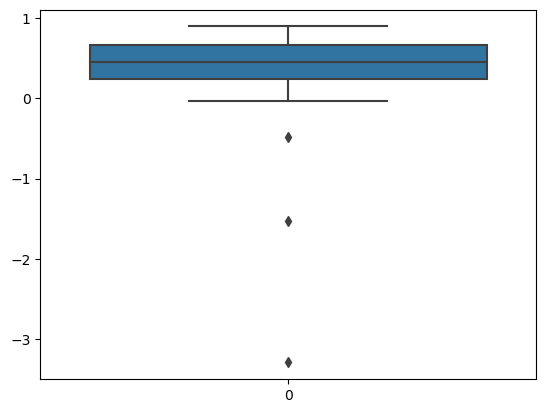

In [99]:
sns.boxplot(test_data['lgd_pct'])

In [100]:
# Repacing -ve values with 0 as LGD can not be -ve.
test_data['lgd_pct'] = test_data['lgd_pct'].apply(lambda x : x if x > 0 else 0)

<Axes: >

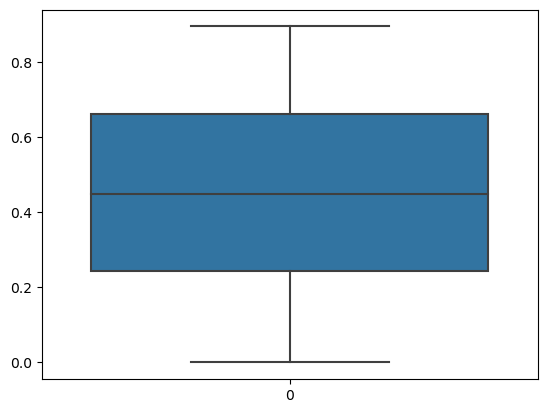

In [101]:
sns.boxplot(test_data['lgd_pct'])

In [102]:
# Exploring the various variables

In [103]:
data.loan_type.value_counts(normalize = True)

Two-Wheeler         0.25170
Car                 0.25092
Personal            0.24898
Consumer-Durable    0.24840
Name: loan_type, dtype: float64

In [104]:
# We see that the default is quite evenly distributed in all types of loans

# Making dummy variables for the loan type !!

In [105]:
dummies = pd.get_dummies(data['loan_type'], drop_first = True)

In [106]:
data = pd.concat([data, dummies], axis=1)

In [107]:
data.shape

(50000, 18)

In [108]:
data.drop(['loan_type'], axis=1, inplace = True)

In [109]:
data.head()

,loan_acc_num,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct,Consumer-Durable,Personal,Two-Wheeler
0,LN79307711,21916,4929.47,3,0,3,127,2,10.1,1012.32,15,13572.58,585.51,0.155774,1,0,0
1,LN88987787,121184,10254.50,1,0,0,156,2,11.8,5693.24,15,96243.61,7382.03,0.121187,0,0,1
2,LN78096023,487036,116183.86,0,1,10,22,3,14.6,16788.02,3,74083.73,7812.88,0.609336,0,0,0
3,LN56862431,52125,10310.05,5,2,9,30,2,9.6,2395.69,7,0.00,518.08,0.802205,0,0,1
4,LN77262680,8635,1051.25,0,1,3,62,2,9.6,396.87,13,4462.52,323.68,0.361463,1,0,0


In [110]:
num_cols = data.select_dtypes('number').columns
num_cols

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'loan_tenure', 'repayment_amount', 'balance_amount',
       'lgd_pct', 'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [111]:
num_cols = num_cols.drop('Consumer-Durable')
num_cols = num_cols.drop('Personal')
num_cols = num_cols.drop('Two-Wheeler')
num_cols = num_cols.drop('lgd_pct')
num_cols

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'loan_tenure', 'repayment_amount', 'balance_amount'],
      dtype='object')

In [112]:
#applying MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [113]:
data.head()

,loan_acc_num,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct,Consumer-Durable,Personal,Two-Wheeler
0,LN79307711,0.009968,0.008319,0.272727,0.000000,0.078947,0.460905,0.25,0.300000,0.005403,0.240741,0.007328,0.002236,0.155774,1,0,0
1,LN88987787,0.059652,0.017306,0.090909,0.000000,0.000000,0.580247,0.25,0.542857,0.031484,0.240741,0.051964,0.028197,0.121187,0,0,1
2,LN78096023,0.242762,0.196076,0.000000,0.166667,0.263158,0.028807,0.50,0.942857,0.093301,0.018519,0.040000,0.029843,0.609336,0,0,0
3,LN56862431,0.025088,0.017399,0.454545,0.333333,0.236842,0.061728,0.25,0.228571,0.013111,0.092593,0.000000,0.001979,0.802205,0,0,1
4,LN77262680,0.003321,0.001774,0.000000,0.166667,0.078947,0.193416,0.25,0.228571,0.001974,0.203704,0.002409,0.001236,0.361463,1,0,0


In [114]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct,Consumer-Durable,Personal,Two-Wheeler
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.190034,0.096515,0.160431,0.251590,0.258113,0.267555,0.498655,0.497798,0.092202,0.283883,0.081774,0.029145,0.450899,0.248400,0.248980,0.251700
std,0.252133,0.157637,0.160016,0.209898,0.204948,0.181652,0.353885,0.288550,0.148726,0.240574,0.137952,0.061423,0.240824,0.432089,0.432427,0.433994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010979,0.005619,0.000000,0.000000,0.105263,0.119342,0.250000,0.242857,0.006218,0.092593,0.003652,0.001521,0.242358,0.000000,0.000000,0.000000
50%,0.095440,0.033522,0.090909,0.166667,0.210526,0.259259,0.500000,0.500000,0.036209,0.222222,0.026203,0.008079,0.455331,0.000000,0.000000,0.000000
75%,0.215921,0.105162,0.272727,0.333333,0.394737,0.403292,0.750000,0.742857,0.108056,0.444444,0.090154,0.027788,0.666919,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.898372,1.000000,1.000000,1.000000


### Making loan column in both data sets numeric

In [115]:
test_data['loan_acc_num'] = test_data['loan_acc_num'].str.slice(2)

In [116]:
data['loan_acc_num'] = data['loan_acc_num'].str.slice(2)

In [117]:
test_data['loan_acc_num'] = test_data['loan_acc_num'].apply(pd.to_numeric)

In [118]:
data['loan_acc_num'] = data['loan_acc_num'].apply(pd.to_numeric)

## Getting Dummies for the test data set.

In [119]:
test_data.head()

,loan_acc_num,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct
0,14086568,Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,5,675861.06,26560.585900,0.455114
1,37082418,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,37,2208.65,80.711500,0.791917
2,42963368,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,7,111812.52,15501.249531,0.421549
3,54572294,Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,15,18310.58,2806.722143,0.768804
4,65792799,Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,7,3428.64,673.018859,0.152124


In [120]:
dummies = pd.get_dummies(test_data['loan_type'], drop_first= True)

In [121]:
test_data = pd.concat([test_data, dummies], axis = 1)

In [122]:
# Since we have the dummies column we dont need 'loan_type' column.
test_data.drop(['loan_type'], axis = 1, inplace = True)

In [123]:
test_data[num_cols] = scaler.fit_transform(test_data[num_cols])

In [124]:
test_data.head()

,loan_acc_num,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,loan_tenure,repayment_amount,balance_amount,lgd_pct,Consumer-Durable,Personal,Two-Wheeler
0,14086568,0.629557,0.017218,0.3,0.166667,0.142857,0.400000,0.00,0.585714,0.630498,0.055556,0.381256,0.119107,0.455114,0,0,0
1,37082418,0.009877,0.003909,0.0,0.500000,0.742857,0.109091,1.00,0.600000,0.002480,0.648148,0.001246,0.000362,0.791917,1,0,0
2,42963368,0.102994,0.014047,0.1,0.333333,0.000000,0.218182,0.00,0.842857,0.104764,0.092593,0.063074,0.069513,0.421549,0,0,0
3,54572294,0.095917,0.044691,0.4,0.500000,0.342857,0.000000,0.25,0.642857,0.051338,0.240741,0.010329,0.012586,0.768804,0,0,1
4,65792799,0.001989,0.002774,0.1,0.166667,0.000000,0.622727,0.00,0.942857,0.002779,0.092593,0.001934,0.003018,0.152124,1,0,0


In [125]:
test_data.shape

(10000, 17)

In [126]:
# Checking Corelation between variables

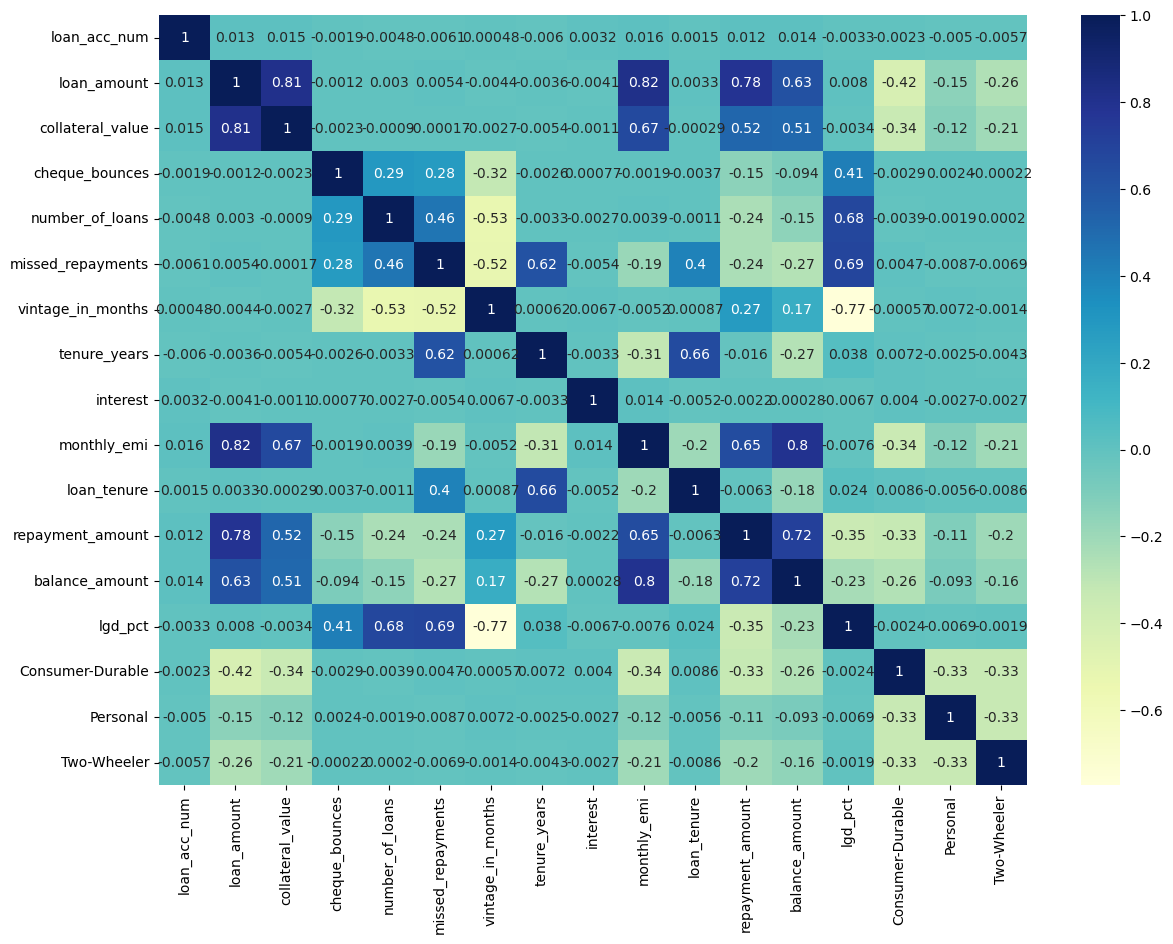

In [127]:
plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [128]:
# We see that lot of variables, factors have strong relationship with target factor.

### Prepairing Data for Modeling

In [129]:
X_train = data.drop('lgd_pct', axis = 1)
y_train = data['lgd_pct']
X_test = test_data.drop('lgd_pct', axis = 1)
y_test = test_data['lgd_pct']

# Building Model

In [130]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr_1.params

const                4.169843e-01
loan_acc_num         3.041764e-12
loan_amount          1.977541e-01
collateral_value    -1.278627e-01
cheque_bounces       1.074226e-01
number_of_loans      2.069781e-01
missed_repayments    6.802345e-01
vintage_in_months   -3.760851e-01
tenure_years        -2.173195e-01
interest            -2.608713e-03
monthly_emi          1.380111e-01
loan_tenure         -1.644212e-03
repayment_amount    -3.263841e-01
balance_amount      -3.890404e-01
Consumer-Durable    -9.979395e-04
Personal            -2.201339e-04
Two-Wheeler         -5.504809e-05
dtype: float64

In [131]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.717e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:44   Log-Likelihood:                 47017.
No. Observations:               50000   AIC:                        -9.400e+04
Df Residuals:                   49983   BIC:                        -9.385e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4170      0.00

### Variance Inflation Factor

In [132]:
# Check for the VIF values of the feature variables. We want VIF to be less than 5.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
1,loan_amount,22.13
7,tenure_years,10.65
9,monthly_emi,10.25
5,missed_repayments,9.29
11,repayment_amount,8.07
12,balance_amount,5.51
6,vintage_in_months,5.02
2,collateral_value,4.95
0,loan_acc_num,4.87
10,loan_tenure,4.19


In [134]:
# As we can see the P Value of 'Two+Wheeler' is very high 
# we will drop the insignificant variable and test further.

In [135]:
X_train = X_train.drop('Two-Wheeler',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\1430195737.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('Two-Wheeler',1)


In [136]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:46   Log-Likelihood:                 47017.
No. Observations:               50000   AIC:                        -9.400e+04
Df Residuals:                   49984   BIC:                        -9.386e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4169      0.00

In [137]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
1,loan_amount,20.22
7,tenure_years,10.63
9,monthly_emi,10.16
5,missed_repayments,9.15
11,repayment_amount,8.07
12,balance_amount,5.51
2,collateral_value,4.95
0,loan_acc_num,4.48
6,vintage_in_months,4.26
10,loan_tenure,4.18


In [138]:
# Dropping personal from the Model as P value is very high.
X_train = X_train.drop('Personal',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\3873789974.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('Personal',1)


In [139]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.962e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:47   Log-Likelihood:                 47017.
No. Observations:               50000   AIC:                        -9.400e+04
Df Residuals:                   49985   BIC:                        -9.387e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4168      0.00

In [140]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
1,loan_amount,19.96
7,tenure_years,10.63
9,monthly_emi,10.15
5,missed_repayments,9.13
11,repayment_amount,8.07
12,balance_amount,5.51
2,collateral_value,4.95
0,loan_acc_num,4.41
10,loan_tenure,4.18
6,vintage_in_months,4.12


In [141]:
# Dropping 'loan_acc_num' from the Model as P value is very high.
X_train = X_train.drop('loan_acc_num',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\2224676173.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('loan_acc_num',1)


In [142]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 2.113e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:48   Log-Likelihood:                 47017.
No. Observations:               50000   AIC:                        -9.401e+04
Df Residuals:                   49986   BIC:                        -9.388e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4170      0.00

In [143]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
0,loan_amount,19.95
6,tenure_years,10.62
8,monthly_emi,10.09
4,missed_repayments,9.03
10,repayment_amount,8.06
11,balance_amount,5.51
1,collateral_value,4.94
9,loan_tenure,4.17
5,vintage_in_months,3.63
3,number_of_loans,3.42


In [144]:
# Dropping 'loan_amount' as VIF is too high.
X_train = X_train.drop('loan_amount',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\1034633755.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('loan_amount',1)


In [145]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.231e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:49   Log-Likelihood:                 46476.
No. Observations:               50000   AIC:                        -9.293e+04
Df Residuals:                   49987   BIC:                        -9.281e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4145      0.00

In [146]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
5,tenure_years,10.62
3,missed_repayments,8.63
7,monthly_emi,6.08
10,balance_amount,4.43
8,loan_tenure,4.17
9,repayment_amount,3.79
4,vintage_in_months,3.59
2,number_of_loans,3.41
6,interest,3.37
0,collateral_value,2.78


In [147]:
# Dropping 'loan_tenure' as VIF is too high.
X_train = X_train.drop('loan_tenure',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\213307851.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('loan_tenure',1)


In [148]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.434e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:50   Log-Likelihood:                 46476.
No. Observations:               50000   AIC:                        -9.293e+04
Df Residuals:                   49988   BIC:                        -9.282e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4144      0.00

In [149]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
3,missed_repayments,8.63
5,tenure_years,8.31
7,monthly_emi,6.08
9,balance_amount,4.43
8,repayment_amount,3.79
4,vintage_in_months,3.57
2,number_of_loans,3.41
6,interest,3.36
0,collateral_value,2.78
1,cheque_bounces,2.21


In [150]:
# Dropping 'missed_repayments' as VIF is too high.
X_train = X_train.drop('missed_repayments',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\3413836430.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('missed_repayments',1)


In [151]:
# Running the Model again

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.419e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:50   Log-Likelihood:                 33869.
No. Observations:               50000   AIC:                        -6.772e+04
Df Residuals:                   49989   BIC:                        -6.762e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4906      0.00

In [152]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
6,monthly_emi,6.02
8,balance_amount,4.40
7,repayment_amount,3.64
5,interest,3.33
4,tenure_years,3.26
3,vintage_in_months,2.95
0,collateral_value,2.78
2,number_of_loans,2.69
1,cheque_bounces,2.10
9,Consumer-Durable,1.50


In [153]:
# Dropping 'monthly_emi' as VIF is too high, above 5.
X_train = X_train.drop('monthly_emi',1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\2372411855.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop('monthly_emi',1)


In [154]:
X_train_lm = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                lgd_pct   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:51:51   Log-Likelihood:                 32903.
No. Observations:               50000   AIC:                        -6.579e+04
Df Residuals:                   49990   BIC:                        -6.570e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5112      0.00

In [155]:
## Checking VIF
vif = pd.DataFrame()
vif['Featue'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Featue,VIF
6,repayment_amount,3.47
5,interest,3.28
7,balance_amount,3.06
4,tenure_years,3.01
3,vintage_in_months,2.94
2,number_of_loans,2.52
0,collateral_value,2.13
1,cheque_bounces,2.08
8,Consumer-Durable,1.49


In [156]:
X_train_lm.head()

,const,collateral_value,cheque_bounces,number_of_loans,vintage_in_months,tenure_years,interest,repayment_amount,balance_amount,Consumer-Durable
0,1.0,0.008319,0.272727,0.000000,0.460905,0.25,0.300000,0.007328,0.002236,1
1,1.0,0.017306,0.090909,0.000000,0.580247,0.25,0.542857,0.051964,0.028197,0
2,1.0,0.196076,0.000000,0.166667,0.028807,0.50,0.942857,0.040000,0.029843,0
3,1.0,0.017399,0.454545,0.333333,0.061728,0.25,0.228571,0.000000,0.001979,0
4,1.0,0.001774,0.000000,0.166667,0.193416,0.25,0.228571,0.002409,0.001236,1


In [157]:
# We can say that our our OLS Regression model is ready to be implemented.

In [158]:
# Prepare Test Data for implementing the model. 
X_test = X_test.drop(['Two-Wheeler', 'loan_amount', 'loan_tenure', 'missed_repayments', 'monthly_emi'], axis = 1)

In [159]:
X_test = X_test.drop(['loan_acc_num','Personal'],1)

C:\Users\amann\AppData\Local\Temp\ipykernel_14360\4152939079.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['loan_acc_num','Personal'],1)


In [160]:
# Adding Constant variable to test dataframe
X_test_fnl = sm.add_constant(X_test)

In [161]:
X_test_fnl.head()

,const,collateral_value,cheque_bounces,number_of_loans,vintage_in_months,tenure_years,interest,repayment_amount,balance_amount,Consumer-Durable
0,1.0,0.017218,0.3,0.166667,0.400000,0.00,0.585714,0.381256,0.119107,0
1,1.0,0.003909,0.0,0.500000,0.109091,1.00,0.600000,0.001246,0.000362,1
2,1.0,0.014047,0.1,0.333333,0.218182,0.00,0.842857,0.063074,0.069513,0
3,1.0,0.044691,0.4,0.500000,0.000000,0.25,0.642857,0.010329,0.012586,0
4,1.0,0.002774,0.1,0.166667,0.622727,0.00,0.942857,0.001934,0.003018,1


In [162]:
y_pred_fnl = lr_8.predict(X_test_fnl)

In [163]:
from sklearn.metrics import r2_score

In [164]:
r2_score(y_test, y_pred_fnl)

0.7187743649739935

In [165]:
sklearn.metrics.mean_squared_error(y_test, y_pred_fnl)

0.016133911231650675

## Now trying Decision Tree Modeling

In [166]:
X_train = data.drop('lgd_pct', axis = 1)
y_train = data['lgd_pct']
X_test = test_data.drop('lgd_pct', axis = 1)
y_test = test_data['lgd_pct']

In [167]:
X_train.shape

(50000, 16)

In [168]:
X_test.shape

(10000, 16)

In [169]:
y_train.shape

(50000,)

In [170]:
y_test.shape

(10000,)

In [171]:
#from sklearn.ensemble import Decision Tree.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

In [172]:
dt = DecisionTreeRegressor(random_state=45, max_depth=5, min_samples_leaf = 20)
model = dt.fit(X_train, y_train)

y_pred_dt1 = dt.predict(X_test)

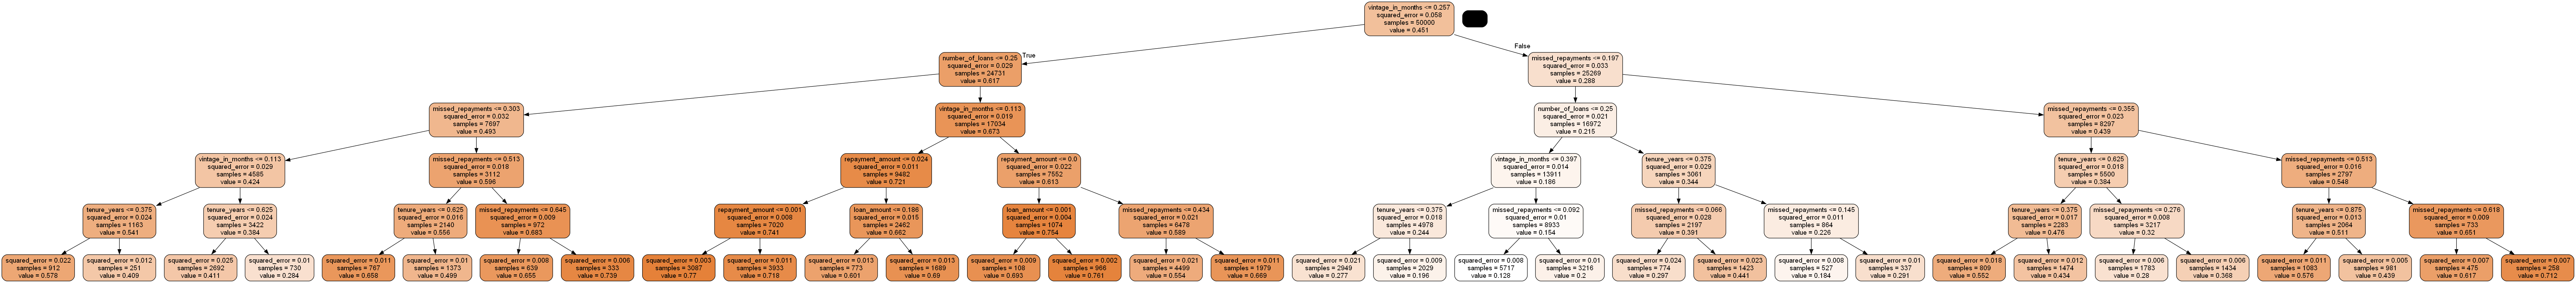

In [173]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


dot_data = StringIO()

export_graphviz(model, out_file = dot_data, filled = True, rounded = True,
               feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [174]:
r2_score(y_test, y_pred_dt1)

0.7814103580444152

In [175]:
sklearn.metrics.mean_squared_error(y_test, y_pred_dt1)

0.012540485077555518

##### WE find that our r2 score has improved slighly from 0.71 to 0.78.

## Checking performance with Randome Forest

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

model = rfr.fit(X_train, y_train)

In [178]:
y_pred_rfr1 = rfr.predict(X_test)

In [179]:
sample_tree = rfr.estimators_[24]

In [180]:
r2_score(y_test, y_pred_rfr1)

0.906434623276438

We see a significant improvement in r2Score with adoption of Randome Forest Regressor. 

In [181]:
sklearn.metrics.mean_squared_error(y_test, y_pred_rfr1)

0.005367844514865458